<a href="https://colab.research.google.com/github/stoicelephant/DIDA325/blob/main/Copy_of_325_Fall_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Setup, I import all of the neccessary libraries that I need and load in my data set.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
voter_reg = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

I've been hired to work with a government organizatrion interested in formation about voter registration in the US.

The purpose of this project is to find relevant trands in voter registration to better allocate governemnt resources during certain times of the year throughout different stats.

The goal of this project is to analyze the data we've been given by the governemnt organization and find relevant trends that can give us an idea about when and where federal funding supporting voter registration needs to go.

This notebook is important for someone interested in seeing some of the trends relating to the 2016 and 2020 voter registration. It gives a good overview of the trends across the different years, months, and states.

Q1): State: Do different states register voters more frequently in certain months than others?

Q2): National: Distinction in Monthly Voter Registration Across different electoral years (2016 and 2020)

Before I start digging into the deeper trends, I'd like to perform an exploratory data analysis.

In [69]:
voter_reg.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [198]:
voter_reg.dtypes

,0
NAME,object
Year,int64
Month,object
registered_voters,int64


As we can see the data is comprised of 5 different columns w/ the following data types. Namely;
1) Juridiction - the state of interest - object/string
2) Year - the year of interest - int64
3) Month - the month of interest - object/string
4) New Registered Voters - the number of newly registered voters located in the juisdicitional state of interest during the respective year and month of interest. - int64

I am now going to check the table to see if theres any empty/null values that I will have to deal with. As can be seen in the code cell below, there is no N/A cells in our dataframe.

In [70]:
voter_reg.isna().sum()

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


To make my life a little easier when referencing the columns of the table, I am going to rename the 'jurisdiction' column to 'NAME' and the 'New registered voters' to 'registered_voters'

In [199]:
voter_reg = voter_reg.rename(columns={'Jurisdiction':'NAME','New registered voters':'registered_voters'})

Limitation of My Data: <br>
1) There are only 106 rows / lines of data in my DataFrame. This isn't a ton of data, making it difficult to find meaninful trends.
2) As can be seen in the line of code below we must be aware that we are working specifically with data from 11 distinct states and 1 federal district ( The District of Columbia) - Additionally back to the first point there is only a few pieces of data for each of these locations. Also, most of these states are in the southern half of the US.
3) We only have data on the electoral years of 2016 and 2020, during the electoral months of January (01) -May (05)

In [73]:
voter_reg.NAME.unique()

array(['Arizona', 'California', 'Colorado', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois',
       'Maryland', 'North Carolina', 'Texas', 'Virginia'], dtype=object)

In [74]:
voter_reg.Year.unique()

array([2016, 2020])

In [75]:
voter_reg.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May'], dtype=object)

To continue my EDA, i want to get some quantitative figures relating to the data.

As can be seen in the data below i get an idea on the distribution of the voter registration counts, specifically finding the max as well as a measure of central tendency, specifically

I compute $$\sum_{n\in N}{\text{registered_voters}_n}/N$$ where n is each of the rows in the data. I obtained that on average, approximately 48,200 people were newely registered voters per state per voting month.


In [76]:
voter_reg.loc[voter_reg.registered_voters == voter_reg.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [77]:
reg_mean = float(voter_reg.registered_voters.mean())
print(reg_mean)

48223.46226415094


For now I want to focus on the (state,month,year) pairs which have voter registration figures higher than the average. As can be seen in the cell below this has occured 36 times.

In [210]:
high_voters = voter_reg.loc[voter_reg.registered_voters > reg_mean]
len(high_voters)

36


Specifically though, some states had more voter registration counts above the mean than others, namely Texas, Florida, and California, as can be seen below.


In [79]:
high_voters.value_counts('NAME')

,count
NAME,
Texas,8
Florida,7
California,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


In fact these 3 states also had the highest average voter registration.

In [80]:
voter_reg.groupby('NAME').registered_voters.mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


Now I want to make some visualizations to be able to see the relationship between states and thier total registered voters. Doing this gives the federal government and idea of what states need more federal support to register the voters.

In [211]:
total_voter = voter_reg.groupby('NAME').registered_voters.sum().reset_index()


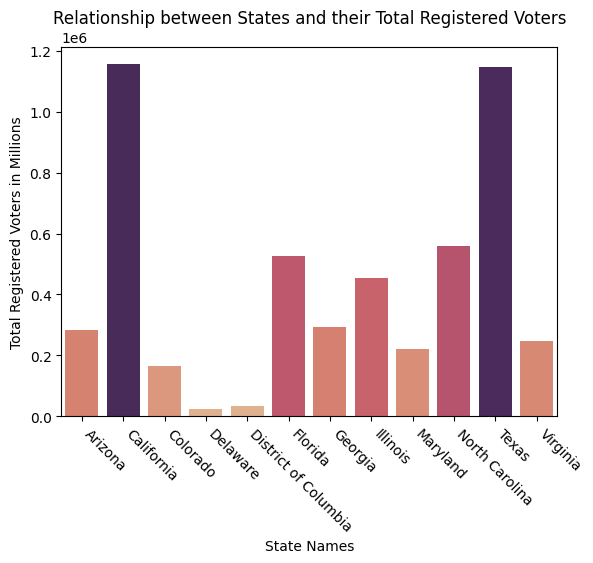

In [115]:
sns.barplot(total_voter, x='NAME',y='registered_voters',legend=False,hue='registered_voters',palette='flare')
plt.xlabel('State Names')
plt.ylabel('Total Registered Voters in Millions')
plt.xticks(rotation=-45, ha='left')
plt.title('Relationship between States and their Total Registered Voters')
plt.show()

The most obvious trend that I see is that there is a direct correlation between the size of states and the number of registered voters. This communicated to the federal government that we will usually have to allocate more resources to voter registration in bigger states than in smaller ones, but this was probably already known. We also learned that historically across 2016 and 2020 combined, we haven't had to register more than 1.2M voters.  

To further explore my data, I want to see which months may require more attention and support depending on the number of voters we've had to register in the past.

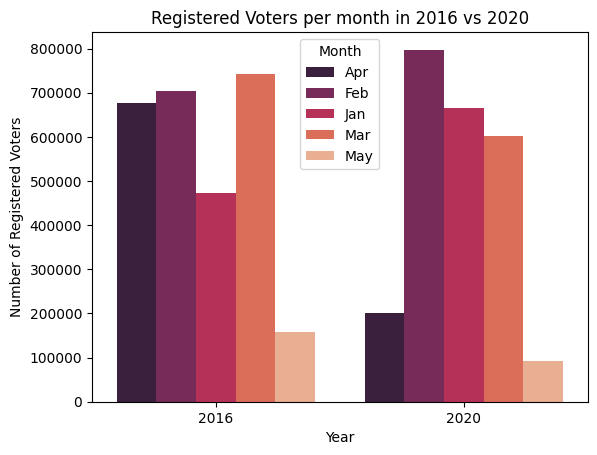

In [182]:
voter_reg
year_month_reg = voter_reg.groupby(['Year','Month']).registered_voters.sum().reset_index()
year_month_reg
sns.barplot(year_month_reg, x='Year',y='registered_voters',hue='Month',palette='rocket')
plt.xlabel('Year')
plt.ylabel('Number of Registered Voters')
plt.title('Registered Voters per month in 2016 vs 2020')

plt.show()

The relationships which I see is initially, we only have registed voters during the months of Jan-May, being that these are voter registration months, and people can't register outside of these months. The biggest difference I notice is the disparity between the number of voters which registered in April in 2016 which was much higher than the number of voters which registered in April of 2020. I also noticed that in 2016, March has the highest count of registered voters while Feb has the 2nd highest. But in 2020, Feb has the highest, and March was 3rd highest. I finally notice that overall, the number of voters which registered in 2016 was larger overall than the number of voters which registered in 2020.

Now I want to dive into my researh question I presented at the beginning.

State Level Research Question: Do different states register voters more frequently in certain months than others?

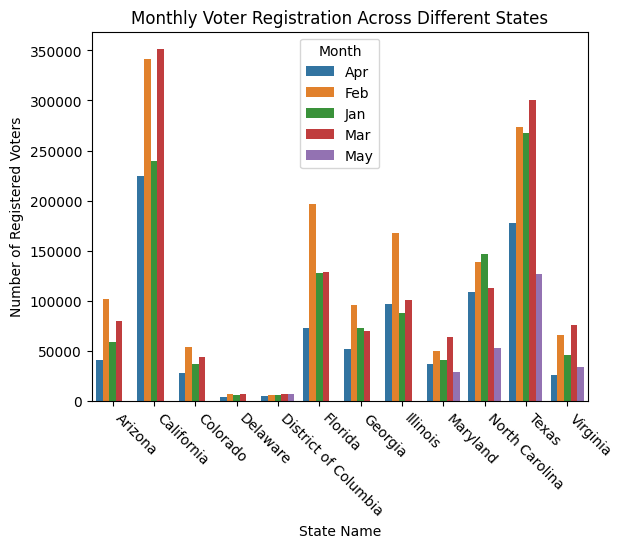

In [197]:
state_q = voter_reg.groupby(['NAME','Month']).sum().reset_index()
state_q
sns.barplot(state_q,x='NAME', y='registered_voters',hue='Month')
plt.xlabel('State Name')
plt.ylabel('Number of Registered Voters')
plt.title('Monthly Voter Registration Across Different States')
plt.xticks(rotation=-45, ha='left')
plt.show()

Notice that In general, across all of the states, voter registration is most frequent in the months of February and March, with the lowest frequenct in (technically May) but also April. Also notice that some states don't even offer voters registration in the month of May. Finally in general, the relationships across that states follow a bimodal distribution with peaks at Feb and March.

##Notebook Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)

This should only be reflective of *your data* as presented here.


Each section should be at least 3-4 complete sentences.


Conclusion:

Insights:
The analysis which I've performed has provided insights to the trends between voter registration across different years, months, and states. Specifically, we've seen Larger States have a higher number of total registered voters. We've also seen that the number of registered voters in April dropped from 2016 to 2020. Finally, we've noticed that voter registration is most frequent in the months of February and March.

Suggestions:
My suggestions to my client would be to use my findings to decide how to allocate federal resources to support voter registration. Specifically I would advise my client to allocate resources more to larger states during the middle electoral months of February and March. Finally, I'd suggest that depending on voter registration trends during the early months, we'd have an idea about how much/how little remaining voters there are that require support registering.

Possible Next steps:
If I were to continue working on this analysis, I would attempt to get some more external data on these states, including the population size so that I could better support some of my arguments. I could also use this to keep track of the number of registered voters compared to the number of people in the state who still need to register, giving the federal governemnt and idea of what they will have to prepare for in the following months.Finally, I'd

##Stakeholder Analysis(14 points as noted)
*Loosely adapted from the [Cambridge Analytica/Facebook reveal](https://www.google.com/search?q=cambridge+analytica+facebook+&sca_esv=d43255849d412494&rlz=1C1ONGR_enUS1069US1069&sxsrf=AE3TifP9Zpi1D8vk3Z__wLxSQ-IMSAubZg%3A1758661179884&ei=OwrTaMHdNYmx5NoPkdTiqQY&ved=0ahUKEwiB56C34--PAxWJGFkFHRGqOGUQ4dUDCBA&uact=5&oq=cambridge+analytica+facebook+&gs_lp=Egxnd3Mtd2l6LXNlcnAiHWNhbWJyaWRnZSBhbmFseXRpY2EgZmFjZWJvb2sgMgoQIxiABBgnGIoFMgUQABiABDIIEAAYgAQYxwMyCBAAGIAEGMcDMggQABiABBjHAzIFEAAYgAQyCBAAGIAEGMcDMgYQABgWGB4yBhAAGBYYHjIGEAAYFhgeSJoJUI4DWI4DcAF4AZABAJgBa6ABa6oBAzAuMbgBA8gBAPgBAZgCAqAChAHCAgoQABiwAxjWBBhHmAMAiAYBkAYIkgcDMS4xoAelCLIHAzAuMbgHc8IHBTItMS4xyAcV&sclient=gws-wiz-serp) in 2018. While it is not necessary to look this up, it's always good to know*.

All answers should be in full sentences and in a text box, not code.

You work for a social media company which is currently allowing third party apps access to data through the use of an API; this means another company can create an app on your platform and acces the data of users who consent.

One such company is a lobbying group. They create a third party app called "Get Out and Vote!" that asks users about their voter registration and other habits. While users of the app must give consent, the app also allows the lobbying group to collect data on the social media habits of the friends of those who consented to the app. While only only a few hundred thousand partake in the original app, the company is still able to collect from millions of users.

They use this data to create personality profiles of unregistered voters. That data is then sold to specific political campaigns who use the information to create political ads that encourage people in populated US cities *not to vote* while creating ads that tell people in swing states *to vote*.

While it is not necessary to do research on swing states, here is some information about the demographics of that if you are [curious](https://www.npr.org/2024/09/06/nx-s1-5101765/swing-states-demographics-electorate).


Identify a key ethical issue here, from the standpoint of the social media company (3 points).

A key key ethical issue is the social media company is allowing the collection and use of personal data, going against privacy of the individuals using the app.

What are at least three of our ethical standards that apply to this situation, and why are they relevant (5 points).

- Respect for Privacy - users have a right to privacy of their information, and it shouldnt be shared without their consent
- Transparency - it should be clear to the user who is having their data collected how their data is going to be used
- Positive Impacy - the collected data is being use to manipulate behavior be discouraging groups from voting, this is harmful to democracy and there is no positive impact

Your company wants to continue work with the lobbying firm and does not want to lose them as a client. Looking at this from a *utilitarian ethics* standpoint, propose an alternative action that allows you to work with them while still addressing the ethical issue you mentioned above (6 points).



From a utilitarian standpoing, the best solution would be to maximize benefit over harm. The company could restrict data sharing unless specified by the user and consent was given. Without collecting from friends witout permission, there should be transparency. This allows the lobbying firm to conduct outreach without infringing upon user autonomy

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

###You can also find my project in my [github](https://github.com/stoicelephant/DIDA325/blob/main/325_Fall_Midterm_Project.ipynb)

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

JAMES GIUFFRE